In [54]:
import seaborn as sns; sns.set_style("whitegrid")
import random
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
class MIR(object):
    def __init__(self, study_level, n_questions, answer_unknowns):
        self.study_level = study_level
        self.n_questions = n_questions
        self.answer_unknowns = answer_unknowns

    def solveExam(self):
        score = 0
        for question in range(0, self.n_questions):
            score = self._answerQuestion(score)
        return((score / self.n_questions) * 10)

    def _answerQuestion(self, score):
        chance = random.randint(1, 10)
        if chance <= self.study_level:
            score += 1
        elif self.answer_unknowns:
            result = random.choice(['a', 'b', 'c', 'd'])
            answer = random.choice(['a', 'b', 'c', 'd'])
            if result == answer:
                score += 1
            else:
                score -= 0.25
        return(score)

    def _getScoreProgress(self):
        score_Progress = []
        score = 0
        for question in range(0, self.n_questions):
            score = self._answerQuestion(score)
            score_Progress.append((score / self.n_questions) * 10)
        return(score_Progress)

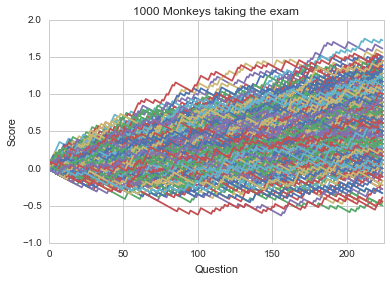

In [32]:
itera = 0
mir = MIR(study_level = 0, n_questions=225, answer_unknowns=True)
while itera < 1000:
    itera += 1
    plt.plot(mir._getScoreProgress())
plt.ylabel("Score")
plt.xlabel("Question")
plt.title("1000 Monkeys taking the exam")
plt.xlim(0, 225)
plt.savefig('score_evolution.png', dpi=300)

In [62]:
def solve_ManyExams(study_level, max_iter=1000):
    iteration = 0
    distrib1 = []
    distrib2 = []
    while iteration < max_iter:
        mir1 = MIR(
            study_level=study_level, n_questions=250, answer_unknowns=True)
        mir2 = MIR(
            study_level=study_level, n_questions=250, answer_unknowns=False)
        distrib1.append(mir1.solveExam())
        distrib2.append(mir2.solveExam())
        iteration += 1
    mean_score_gain = np.mean(distrib1) - np.mean(distrib2)
    mean_std_gain = np.std(distrib1) - np.std(distrib2)
    print(
        "Answering questions for study level {} gains you {:.2f}+-{:.2f} points".format(study_level, mean_score_gain, mean_std_gain))
    return(mean_score_gain, mean_std_gain)

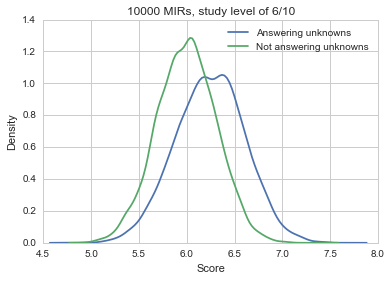

In [28]:
sns.distplot(distrib1, hist=False, label='Answering unknowns')
sns.distplot(distrib2, hist=False, label='Not answering unknowns')
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("{} MIRs, study level of 6/10".format(iteration))
plt.legend()
plt.savefig('average_mir.png', dpi=300)

In [63]:
solve_ManyExams(study_level=2, max_iter=100)

Answering questions for study level 2 gains you 0.54+-0.16 points


(0.54319999999999968, 0.16065740288278127)

In [78]:
mean_list = []
std_list = []
for study_level in range(0,11):
    mean, std = solve_ManyExams(study_level, max_iter=10000)
    mean_list.append(mean)
    std_list.append(std)

Answering questions for study level 0 gains you 0.62+-0.34 points
Answering questions for study level 1 gains you 0.56+-0.18 points
Answering questions for study level 2 gains you 0.50+-0.14 points
Answering questions for study level 3 gains you 0.45+-0.10 points
Answering questions for study level 4 gains you 0.38+-0.08 points
Answering questions for study level 5 gains you 0.32+-0.06 points
Answering questions for study level 6 gains you 0.26+-0.05 points
Answering questions for study level 7 gains you 0.19+-0.04 points
Answering questions for study level 8 gains you 0.12+-0.03 points
Answering questions for study level 9 gains you 0.06+-0.02 points
Answering questions for study level 10 gains you 0.00+-0.00 points


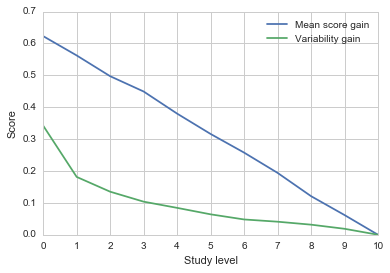

In [80]:
plt.plot(list(range(0,11)),mean_list, label="Mean score gain")
plt.plot(list(range(0,11)),std_list, label="Variability gain")
plt.xlabel("Study level")
plt.ylabel("Score")
plt.xticks([x for x in range(0, 11)])
plt.legend()
plt.savefig("change_StudyLevel.png", dpi=300)